# t-SNE Dimensionality Reduction
The purpose of this notebook is to reduce the dimensionality of a latent space vector of a piece of art fed through Inception (trained on ImageNet) for visualization. 

This makes use of a CUDA accelerated t-SNE library found here: https://github.com/CannyLab/tsne-cuda.

## Imports

In [7]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

import glob, os
from tqdm import tqdm

from mpl_toolkits.mplot3d import Axes3D

# import tensorflow as tf
# from tensorflow.contrib.tensorboard.plugins import projector

# import pandas as pd

## Import Dataset

In [160]:
x = np.array([[0, 0, 0], [0.01, 0.01, 0.01], [0.05, 0.05, 0.05], [0, 1, 1],[0.01, 1.01, 1.01], [0.05, 1.05, 1.05],  [1, 0, 1], [1.0, 0.0, 1.0001], [1.0002, 0.0002, 1.], [1, 1, 1], [1.05,1.05,1.05], [1.01,1.01,1.01]])

# Get path to all image numpy arrays
imagePaths = glob.glob("images/*.npz")

# Size of the latent space that the images are transformed into
imgVectorDim = 2048

x = np.zeros(shape = (len(imagePaths), imgVectorDim), dtype = np.float32)
names = [None] * len(imagePaths)

for i, imagePath in tqdm(enumerate(imagePaths)):
    with open(imagePath) as image:
        x[i,:] = np.fromstring(image.read(), dtype = np.float32, sep='\n')
        _, names[i] = os.path.split(imagePath)
        
  

46244it [00:48, 946.11it/s]


In [166]:
num_indices = 1000

x_indices = np.random.choice(x.shape[0], num_indices)

x_new = x[x_indices,:]
names_new = [names[i] for i in x_indices]

## Define TSNE Parameters

In [170]:
n_components = 3
perplexity = 1
learning_rate = 10

## Run TSNE

In [171]:
embedding = TSNE(n_components = n_components, perplexity = perplexity, learning_rate = learning_rate).fit_transform(x_new)
print(embedding.shape)

(1000, 3)


# Output Data

(1000,)


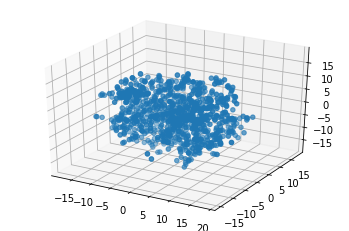

In [172]:
with open("embedding", "w+") as f:
    for name, image in zip(names,embedding):
        f.write("{} {} {} {}\n".format(name, image[0], image[1], image[2]))
        
print(embedding[:,0].shape)
ax = plt.axes(projection='3d')
ax.scatter3D(embedding[:,0], embedding[:,1], embedding[:,2]);